In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Hodgkin–Huxley Model 

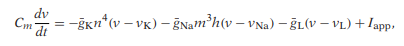

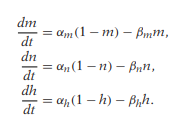

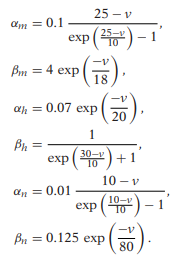

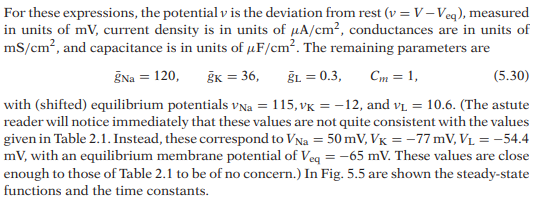

In [ ]:
def alfa_m(v_i):
  return 0.1 * ((25-v_i) / (math.exp((25-v_i)/10) - 1))

def beta_m(v_i):
  return 4 * math.exp(-v_i/18)

def alfa_h(v_i):
  return 0.07 * math.exp(-v_i/20)

def beta_h(v_i):
  return 1 / (math.exp((30-v_i)/10) + 1)

def alfa_n(v_i):
  return 0.01 * ((10-v_i) / (math.exp((10-v_i)/10) - 1))

def beta_n(v_i):
  return 0.125 * math.exp(-v_i/80)

###Primeiros rascunhos

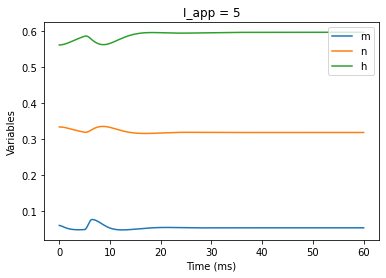

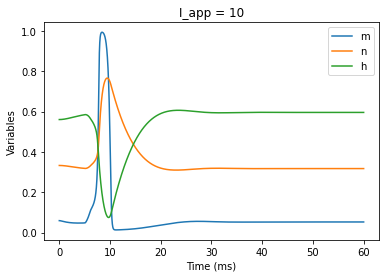

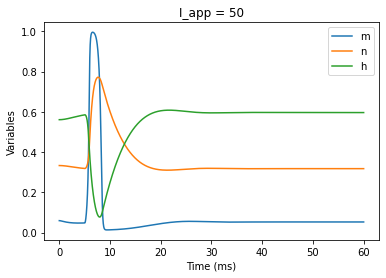

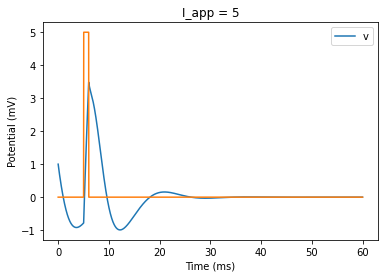

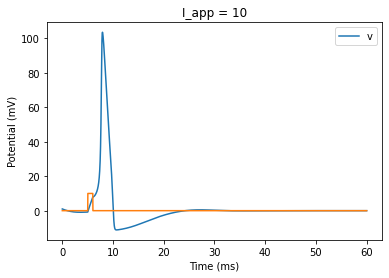

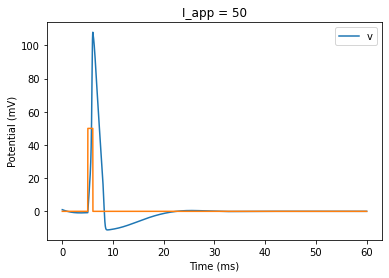

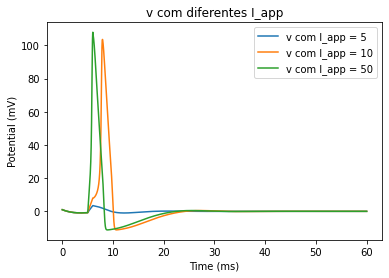

In [ ]:
g_na = 120
g_k = 36
g_l = 0.3
C_m = 1

v_na = 115
v_k = -12
v_l = 10.6

I_app1 = []
I_app2 = []
I_app3 = []

I_app1.append(0)
I_app2.append(0)
I_app3.append(0)

T = 60
delta_t = 0.01
M = T/delta_t

t = np.arange(0.0, T+delta_t, delta_t)

v1 = [] 
m1 = [] 
n1 = []
h1 = []

v2 = [] 
m2 = [] 
n2 = []
h2 = []

v3 = [] 
m3 = [] 
n3 = []
h3 = []

v1.append(1)
m1.append(alfa_m(v1[0]) / (alfa_m(v1[0])+beta_m(v1[0])))
n1.append(alfa_n(v1[0]) / (alfa_n(v1[0])+beta_n(v1[0])))
h1.append(alfa_h(v1[0]) / (alfa_h(v1[0])+beta_h(v1[0])))

v2.append(1)
m2.append(alfa_m(v2[0]) / (alfa_m(v2[0])+beta_m(v2[0])))
n2.append(alfa_n(v2[0]) / (alfa_n(v2[0])+beta_n(v2[0])))
h2.append(alfa_h(v2[0]) / (alfa_h(v2[0])+beta_h(v2[0])))

v3.append(1)
m3.append(alfa_m(v3[0]) / (alfa_m(v3[0])+beta_m(v3[0])))
n3.append(alfa_n(v3[0]) / (alfa_n(v3[0])+beta_n(v3[0])))
h3.append(alfa_h(v3[0]) / (alfa_h(v3[0])+beta_h(v3[0])))

# Euler explicito

for i in range(int(M)):

  if i > 500 and i <= 600:
    I_app1.append(5)
    I_app2.append(10)
    I_app3.append(50)
  else:
    I_app1.append(0)
    I_app2.append(0)
    I_app3.append(0)

  # v
  _v1 = (-(g_k*pow(n1[i],4)*(v1[i]-v_k)) - (g_na*pow(m1[i],3)*h1[i]*(v1[i]-v_na)) - (g_l*(v1[i]-v_l)) + I_app1[i]) / C_m
  v1.append(v1[i] + _v1*delta_t)

  _v2 = (-(g_k*pow(n2[i],4)*(v2[i]-v_k)) - (g_na*pow(m2[i],3)*h2[i]*(v2[i]-v_na)) - (g_l*(v2[i]-v_l)) + I_app2[i]) / C_m
  v2.append(v2[i] + _v2*delta_t)

  _v3 = (-(g_k*pow(n3[i],4)*(v3[i]-v_k)) - (g_na*pow(m3[i],3)*h3[i]*(v3[i]-v_na)) - (g_l*(v3[i]-v_l)) + I_app3[i]) / C_m
  v3.append(v3[i] + _v3*delta_t)

  # m
  _m1 = alfa_m(v1[i]) * (1-m1[i]) - beta_m(v1[i]) * m1[i]
  m1.append(m1[i] + _m1*delta_t)

  _m2 = alfa_m(v2[i]) * (1-m2[i]) - beta_m(v2[i]) * m2[i]
  m2.append(m2[i] + _m2*delta_t)

  _m3 = alfa_m(v3[i]) * (1-m3[i]) - beta_m(v3[i]) * m3[i]
  m3.append(m3[i] + _m3*delta_t)


  # n
  _n1 = alfa_n(v1[i]) * (1-n1[i]) - beta_n(v1[i]) * n1[i]
  n1.append(n1[i] + _n1*delta_t)

  _n2 = alfa_n(v2[i]) * (1-n2[i]) - beta_n(v2[i]) * n2[i]
  n2.append(n2[i] + _n2*delta_t)

  _n3 = alfa_n(v3[i]) * (1-n3[i]) - beta_n(v3[i]) * n3[i]
  n3.append(n3[i] + _n3*delta_t)

  # h
  _h1 = alfa_h(v1[i]) * (1-h1[i]) - beta_h(v1[i]) * h1[i]
  h1.append(h1[i] + _h1*delta_t)

  _h2 = alfa_h(v2[i]) * (1-h2[i]) - beta_h(v2[i]) * h2[i]
  h2.append(h2[i] + _h2*delta_t)

  _h3 = alfa_h(v3[i]) * (1-h3[i]) - beta_h(v3[i]) * h3[i]
  h3.append(h3[i] + _h3*delta_t)


# m, n, h x tempo
plt.figure()
plt.plot(t,m1,label ="m")
plt.plot(t,n1,label ="n")
plt.plot(t,h1,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app1[550]))
plt.show()

plt.figure()
plt.plot(t,m2,label ="m")
plt.plot(t,n2,label ="n")
plt.plot(t,h2,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app2[550]))
plt.show()

plt.figure()
plt.plot(t,m3,label ="m")
plt.plot(t,n3,label ="n")
plt.plot(t,h3,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app3[550]))
plt.show()

# potential x tempo
plt.figure()
plt.plot(t,v1,label ="v")
plt.plot(t,I_app1)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app1[550]))
plt.show()

plt.figure()
plt.plot(t,v2,label ="v")
plt.plot(t,I_app2)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app2[550]))
plt.show()

plt.figure()
plt.plot(t,v3,label ="v")
plt.plot(t,I_app3)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app3[550]))
plt.show()

# potenciais com diferentes I_app
plt.figure()
plt.plot(t,v1,label ="v com I_app = " + str(I_app1[550]))
plt.plot(t,v2,label ="v com I_app = " + str(I_app2[550]))
plt.plot(t,v3,label ="v com I_app = " + str(I_app3[550]))
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("v com diferentes I_app")
plt.show()

###Estudos

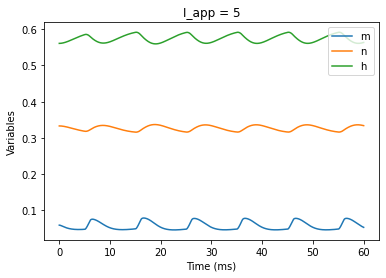

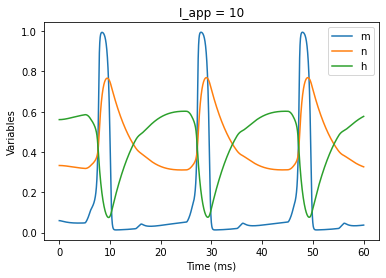

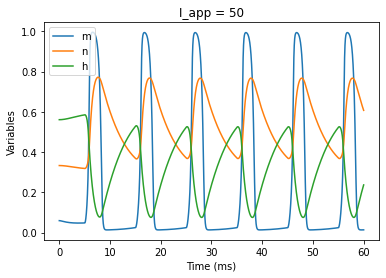

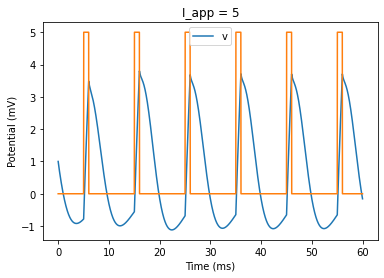

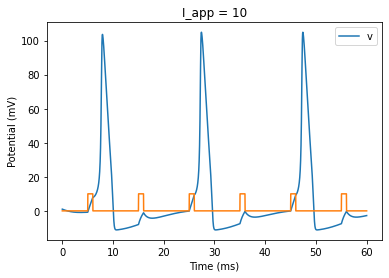

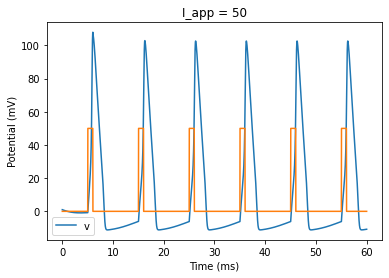

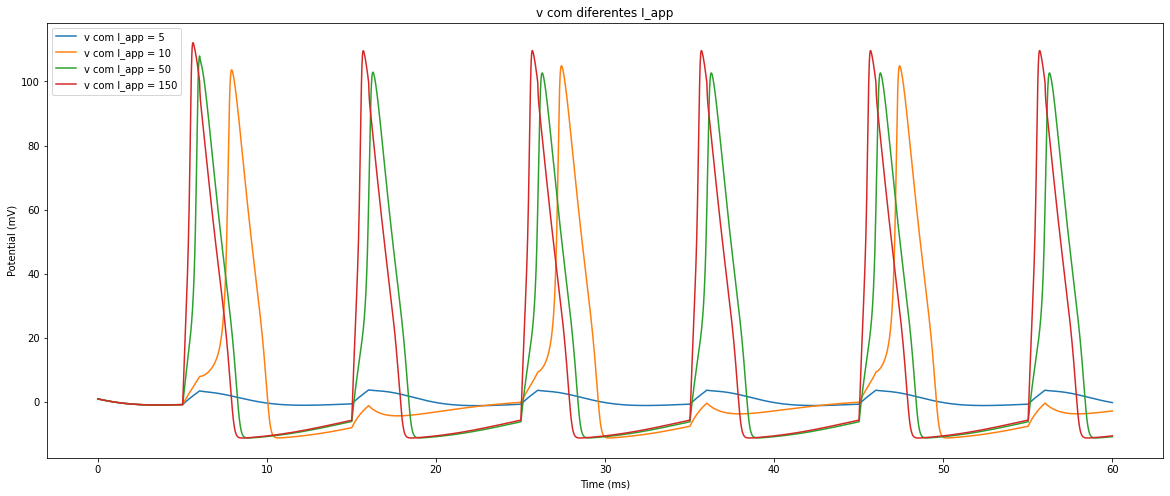

In [ ]:
I_app1 = []
I_app2 = []
I_app3 = []
I_app4 = []

I_app1.append(0)
I_app2.append(0)
I_app3.append(0)
I_app4.append(0)

t = np.arange(0.0, T+delta_t, delta_t)

v1 = [] 
m1 = [] 
n1 = []
h1 = []

v2 = [] 
m2 = [] 
n2 = []
h2 = []

v3 = [] 
m3 = [] 
n3 = []
h3 = []

v4 = [] 
m4 = [] 
n4 = []
h4 = []

v1.append(1)
m1.append(alfa_m(v1[0]) / (alfa_m(v1[0])+beta_m(v1[0])))
n1.append(alfa_n(v1[0]) / (alfa_n(v1[0])+beta_n(v1[0])))
h1.append(alfa_h(v1[0]) / (alfa_h(v1[0])+beta_h(v1[0])))

v2.append(1)
m2.append(alfa_m(v2[0]) / (alfa_m(v2[0])+beta_m(v2[0])))
n2.append(alfa_n(v2[0]) / (alfa_n(v2[0])+beta_n(v2[0])))
h2.append(alfa_h(v2[0]) / (alfa_h(v2[0])+beta_h(v2[0])))

v3.append(1)
m3.append(alfa_m(v3[0]) / (alfa_m(v3[0])+beta_m(v3[0])))
n3.append(alfa_n(v3[0]) / (alfa_n(v3[0])+beta_n(v3[0])))
h3.append(alfa_h(v3[0]) / (alfa_h(v3[0])+beta_h(v3[0])))

v4.append(1)
m4.append(alfa_m(v4[0]) / (alfa_m(v4[0])+beta_m(v4[0])))
n4.append(alfa_n(v4[0]) / (alfa_n(v4[0])+beta_n(v4[0])))
h4.append(alfa_h(v4[0]) / (alfa_h(v4[0])+beta_h(v4[0])))


# Euler explicito

c = 500
for i in range(int(M)):

  if i > c and i <= c+100:
    I_app1.append(5)
    I_app2.append(10)
    I_app3.append(50)
    I_app4.append(150)

    if i == c+100:
      c = c + 1000
  else:
    I_app1.append(0)
    I_app2.append(0)
    I_app3.append(0)
    I_app4.append(0)

  # v
  _v1 = (-(g_k*pow(n1[i],4)*(v1[i]-v_k)) - (g_na*pow(m1[i],3)*h1[i]*(v1[i]-v_na)) - (g_l*(v1[i]-v_l)) + I_app1[i]) / C_m
  v1.append(v1[i] + _v1*delta_t)

  _v2 = (-(g_k*pow(n2[i],4)*(v2[i]-v_k)) - (g_na*pow(m2[i],3)*h2[i]*(v2[i]-v_na)) - (g_l*(v2[i]-v_l)) + I_app2[i]) / C_m
  v2.append(v2[i] + _v2*delta_t)

  _v3 = (-(g_k*pow(n3[i],4)*(v3[i]-v_k)) - (g_na*pow(m3[i],3)*h3[i]*(v3[i]-v_na)) - (g_l*(v3[i]-v_l)) + I_app3[i]) / C_m
  v3.append(v3[i] + _v3*delta_t)

  _v4 = (-(g_k*pow(n4[i],4)*(v4[i]-v_k)) - (g_na*pow(m4[i],3)*h4[i]*(v4[i]-v_na)) - (g_l*(v4[i]-v_l)) + I_app4[i]) / C_m
  v4.append(v4[i] + _v4*delta_t)

  # m
  _m1 = alfa_m(v1[i]) * (1-m1[i]) - beta_m(v1[i]) * m1[i]
  m1.append(m1[i] + _m1*delta_t)

  _m2 = alfa_m(v2[i]) * (1-m2[i]) - beta_m(v2[i]) * m2[i]
  m2.append(m2[i] + _m2*delta_t)

  _m3 = alfa_m(v3[i]) * (1-m3[i]) - beta_m(v3[i]) * m3[i]
  m3.append(m3[i] + _m3*delta_t)

  _m4 = alfa_m(v4[i]) * (1-m4[i]) - beta_m(v4[i]) * m4[i]
  m4.append(m4[i] + _m4*delta_t)


  # n
  _n1 = alfa_n(v1[i]) * (1-n1[i]) - beta_n(v1[i]) * n1[i]
  n1.append(n1[i] + _n1*delta_t)

  _n2 = alfa_n(v2[i]) * (1-n2[i]) - beta_n(v2[i]) * n2[i]
  n2.append(n2[i] + _n2*delta_t)

  _n3 = alfa_n(v3[i]) * (1-n3[i]) - beta_n(v3[i]) * n3[i]
  n3.append(n3[i] + _n3*delta_t)

  _n4 = alfa_n(v4[i]) * (1-n4[i]) - beta_n(v4[i]) * n4[i]
  n4.append(n4[i] + _n4*delta_t)

  # h
  _h1 = alfa_h(v1[i]) * (1-h1[i]) - beta_h(v1[i]) * h1[i]
  h1.append(h1[i] + _h1*delta_t)

  _h2 = alfa_h(v2[i]) * (1-h2[i]) - beta_h(v2[i]) * h2[i]
  h2.append(h2[i] + _h2*delta_t)

  _h3 = alfa_h(v3[i]) * (1-h3[i]) - beta_h(v3[i]) * h3[i]
  h3.append(h3[i] + _h3*delta_t)

  _h4 = alfa_h(v4[i]) * (1-h4[i]) - beta_h(v4[i]) * h4[i]
  h4.append(h4[i] + _h4*delta_t)


# m, n, h x tempo
plt.figure()
plt.plot(t,m1,label ="m")
plt.plot(t,n1,label ="n")
plt.plot(t,h1,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app1[550]))
plt.show()

plt.figure()
plt.plot(t,m2,label ="m")
plt.plot(t,n2,label ="n")
plt.plot(t,h2,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app2[550]))
plt.show()

plt.figure()
plt.plot(t,m3,label ="m")
plt.plot(t,n3,label ="n")
plt.plot(t,h3,label ="h")
plt.legend()
plt.ylabel("Variables")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app3[550]))
plt.show()

# potential x tempo
plt.figure()
plt.plot(t,v1,label ="v")
plt.plot(t,I_app1)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app1[550]))
plt.show()

plt.figure()
plt.plot(t,v2,label ="v")
plt.plot(t,I_app2)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app2[550]))
plt.show()

plt.figure()
plt.plot(t,v3,label ="v")
plt.plot(t,I_app3)
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("I_app = " + str(I_app3[550]))
plt.show()

# potenciais com diferentes I_app
plt.figure(figsize=(20,8))
plt.plot(t,v1,label ="v com I_app = " + str(I_app1[550]))
plt.plot(t,v2,label ="v com I_app = " + str(I_app2[550]))
plt.plot(t,v3,label ="v com I_app = " + str(I_app3[550]))
plt.plot(t,v4,label ="v com I_app = " + str(I_app4[550]))
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("v com diferentes I_app")
plt.show()

### Limiar para o Potencial de Ação

In [ ]:
T_limiar = 30
delta_t_limiar = 0.01
M_limiar = T_limiar/delta_t_limiar

t_limiar = np.arange(0.0, T_limiar+delta_t_limiar, delta_t_limiar)

I = np.arange(1, 50, 0.1)

for i_app in I:

  v = [] 
  m = [] 
  n = []
  h = []

  v.append(1)
  m.append(alfa_m(v[0]) / (alfa_m(v[0])+beta_m(v[0])))
  n.append(alfa_n(v[0]) / (alfa_n(v[0])+beta_n(v[0])))
  h.append(alfa_h(v[0]) / (alfa_h(v[0])+beta_h(v[0])))

  I_app = []
  I_app.append(0)

  for i in range(int(M_limiar)):

    if i > 500 and i <= 600:
      I_app.append(i_app)
    else:
      I_app.append(0)

    _v = (-(g_k*pow(n[i],4)*(v[i]-v_k)) - (g_na*pow(m[i],3)*h[i]*(v[i]-v_na)) - (g_l*(v[i]-v_l)) + I_app[i]) / C_m
    v.append(v[i] + _v*delta_t)

    _m = alfa_m(v[i]) * (1-m[i]) - beta_m(v[i]) * m[i]
    m.append(m[i] + _m*delta_t)

    _n = alfa_n(v[i]) * (1-n[i]) - beta_n(v[i]) * n[i]
    n.append(n[i] + _n*delta_t)

    _h = alfa_h(v[i]) * (1-h[i]) - beta_h(v[i]) * h[i]
    h.append(h[i] + _h*delta_t)
  
  if max(v) >= 100:
    limiar = i_app
    break



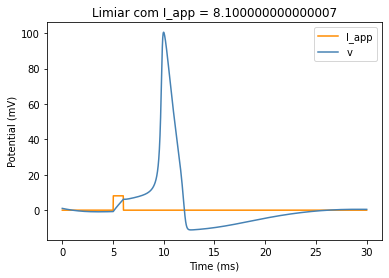

Limiar > 8.100000000000007
Max 100.49227546800061
Min -11.155043556146195


In [ ]:
plt.figure()
plt.plot(t_limiar,I_app,label ="I_app", c="darkorange")
plt.plot(t_limiar,v,label ="v", color="steelblue")
plt.legend()
plt.ylabel("Potential (mV)")
plt.xlabel("Time (ms)")
plt.title("Limiar com I_app = " + str(limiar))
plt.show()

print("Limiar > " + str(limiar))
print("Max " + str(max(v)))
print("Min " + str(min(v)))

### Período refratário 

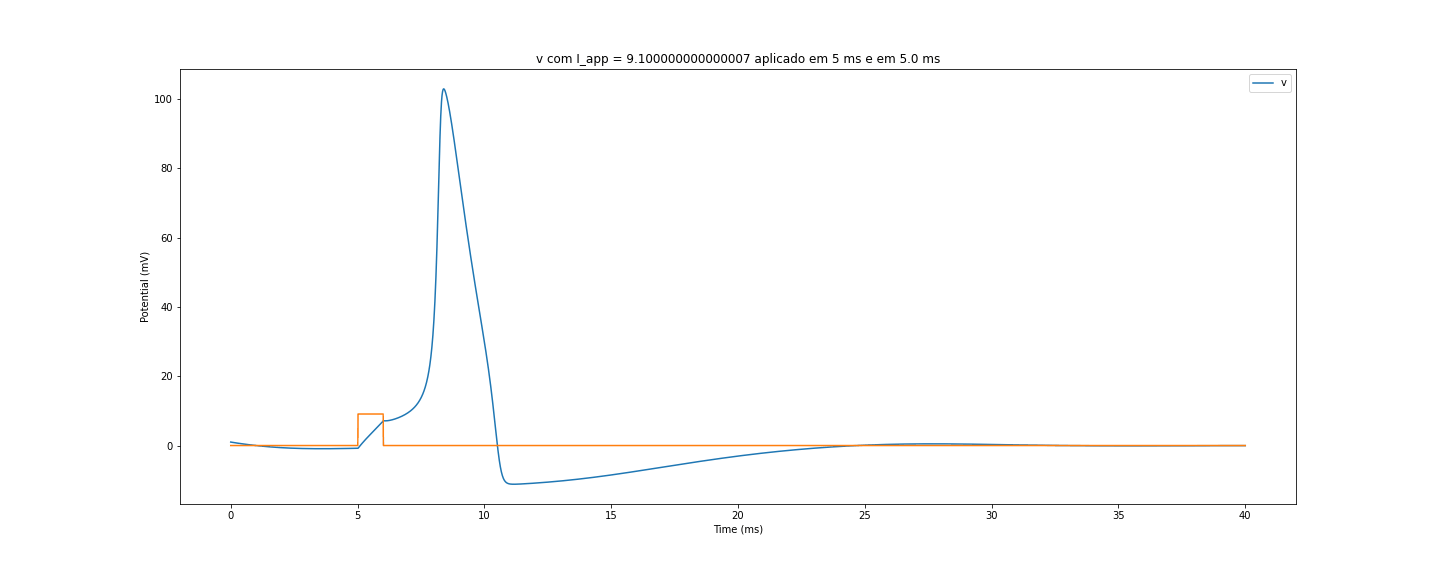

In [ ]:
import imageio
from IPython.display import Image, Video 

filenames = []

act_points = np.arange(500, 4000, 50)

T_refra = 40
delta_t_refra = 0.01
M_refra = T_refra/delta_t_refra

t_refra = np.arange(0.0, T_refra+delta_t_refra, delta_t_refra)

I_initial = limiar + 1
t_change = 0
change_point = 100
aux = 1

for c in range(len(act_points)):
  I_app = []

  I_app.append(0)

  v = [] 
  m = [] 
  n = []
  h = []

  v.append(1)
  m.append(alfa_m(v[0]) / (alfa_m(v[0])+beta_m(v[0])))
  n.append(alfa_n(v[0]) / (alfa_n(v[0])+beta_n(v[0])))
  h.append(alfa_h(v[0]) / (alfa_h(v[0])+beta_h(v[0])))

  for i in range(int(M_refra)):

    if (i > act_points[0] and i <= act_points[0]+100):
      I_app.append(I_initial)
    elif (i > act_points[c] and i <= act_points[c]+100):
      I_app.append(I_initial)
    else:
      I_app.append(0)

    _v = (-(g_k*pow(n[i],4)*(v[i]-v_k)) - (g_na*pow(m[i],3)*h[i]*(v[i]-v_na)) - (g_l*(v[i]-v_l)) + I_app[i]) / C_m
    v.append(v[i] + _v*delta_t)

    _m = alfa_m(v[i]) * (1-m[i]) - beta_m(v[i]) * m[i]
    m.append(m[i] + _m*delta_t)

    _n = alfa_n(v[i]) * (1-n[i]) - beta_n(v[i]) * n[i]
    n.append(n[i] + _n*delta_t)

    _h = alfa_h(v[i]) * (1-h[i]) - beta_h(v[i]) * h[i]
    h.append(h[i] + _h*delta_t)

    if v[i] > change_point and i > 1000:
      t_change = act_points[c]/100
      change_point = 1000
      

  # potenciais com I_app x tempo
  plt.figure(figsize=(20,8))
  plt.plot(t_refra,v, label="v")
  plt.plot(t_refra,I_app)
  if change_point == 1000:
    plt.vlines(t_change, 0, 100, linestyles ="dotted", colors ="k", label="t = " + str(t_change))
  plt.legend()
  plt.ylabel("Potential (mV)")
  plt.xlabel("Time (ms)")
  plt.title("v com I_app = " + str(I_app[550]) + " aplicado em 5 ms e em " + str(act_points[c]/100) + " ms")
  
  filename = f'{c}.png'
  filenames.append(filename)
    
  plt.savefig(filename)
  plt.close()

# build gif
with imageio.get_writer('I'+str(I_app[550])+'.gif', mode='I') as writer:
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

Image(filename='I'+str(I_app[550])+'.gif')

In [ ]:
#Image(filename='I'+str(I_app[550])+'.gif')
#Video(filename='mygif.gif')